## Dependencies

### Library Installation (if needed)

In [1]:
#! pip install -qUr requirements.txt

In [2]:
from methods.screener_methods import *
from tqdm import tqdm
import pandas as pd

### Single import

,Ticker,Name,Signal,Recommendation Score,Value Score,Quality Score,Momentum Score,P/E Score,ROA Score,PB Score,...,P/E,ROA%,Earnings pr. Share,Price to Book,Insider Buy%,50d Average Change%,Sector,Industry,Country,Owned
0,STG.CO,Scandinavian Tobacco Group A/S,Buy,1.74,1.46,0.22,0.06,0.86,0.45,0.15,...,10.3,5.37,9.2,0.89,0.0,0.04,Consumer Defensive,Tobacco,Denmark,True


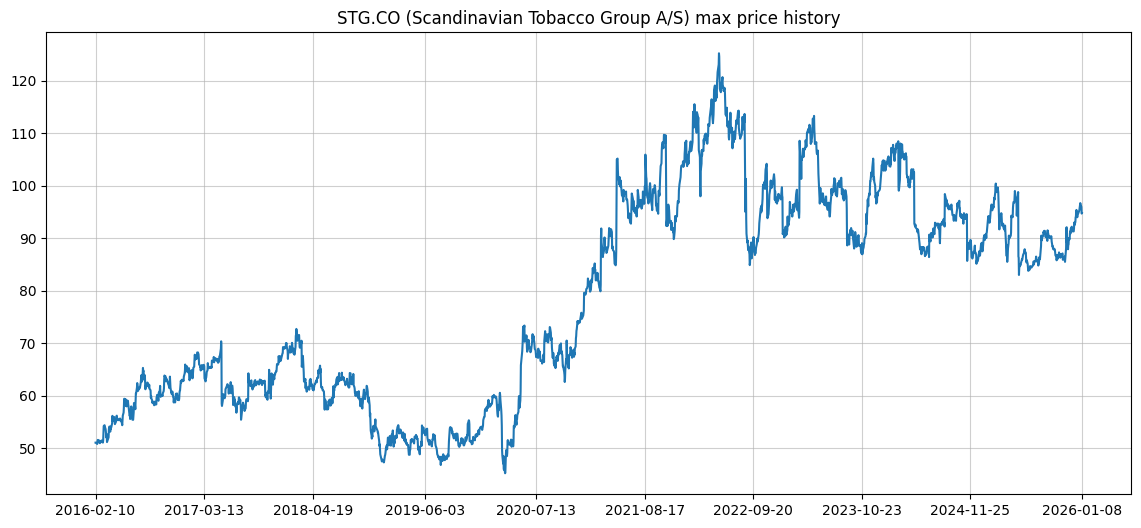

50d Average Change%: 0.038972422


In [9]:
symbol = "STG.CO"
stock = Stock(symbol)
display(stock.summary())
stock.price_graph("max")
print(f"50d Average Change%: {yf.Ticker(symbol).info["fiftyDayAverageChangePercent"]}")


### Screener

In [4]:
symbol_list = "simple" #"simple", "danish", "filtered", "all"

if symbol_list == "all":
    symbols = (
        pd.read_csv("../data/tickers/tickers.csv")["Ticker"].tolist() + 
        pd.read_csv("../data/tickers/danish_tickers.csv")["Ticker"].tolist() + 
        pd.read_csv("../data/tickers/simple_tickers.csv")["Ticker"].to_list()
    )
elif symbol_list == "filtered":
    symbols = pd.read_csv("../data/tickers/screener_filtered_tickers.csv")["Ticker"].tolist()
elif symbol_list == "danish":
    symbols = pd.read_csv("../data/tickers/danish_tickers.csv")["Ticker"].tolist()
else:
    symbols = pd.read_csv("../data/tickers/simple_tickers.csv")["Ticker"].tolist()
symbols = list(set(symbols))

In [5]:
import sys, io
df = pd.DataFrame()
for symbol in tqdm(symbols, smoothing=0):
    old_stderr = sys.stderr
    sys.stderr = io.StringIO()
    try:
        df = pd.concat([df, Stock(symbol).summary()])
    except Exception:
        pass
    finally:
        sys.stderr = old_stderr
df = df.sort_values(by="Recommendation Score", ascending=False)
display(df)
if symbol_list == "simple":
    df.to_csv("../data/screener_results/simple_screener_results.csv", index=False)
elif symbol_list == "danish":
    df.to_csv("../data/screener_results/danish_screener_results.csv", index=False)
elif symbol_list == "filtered" or symbol_list == "all":   
    df.to_csv("../data/screener_results/screener_results.csv", index=False)
    df["Ticker"].to_csv("../data/tickers/screener_filtered_tickers.csv", index=False)

  0%|          | 0/69 [00:00<?, ?it/s]

100%|██████████| 69/69 [00:46<00:00,  1.47it/s]


,Ticker,Name,Signal,Recommendation Score,Value Score,Quality Score,Momentum Score,P/E Score,ROA Score,PB Score,...,P/E,ROA%,Earnings pr. Share,Price to Book,Insider Buy%,50d Average Change%,Sector,Industry,Country,Owned
0,BAVA.CO,Bavarian Nordic A/S,Buy,2.47,2.08,0.36,0.04,1.04,0.92,0.12,...,6.50,7.78,30.70,1.19,0.0,0.02,Healthcare,Biotechnology,Denmark,False
0,HLUN-A.CO,H. Lundbeck A/S A,Buy,2.04,1.91,0.03,0.10,0.89,0.95,0.07,...,9.80,8.28,3.84,1.48,0.0,0.07,Healthcare,Drug Manufacturers - Specialty & Generic,Denmark,True
0,GUBRA.CO,Gubra A/S,Buy,2.00,1.88,-0.00,0.13,1.08,1.00,-0.20,...,4.88,78.15,106.08,6.97,0.0,0.09,Healthcare,Biotechnology,Denmark,True
0,TRMD,TORM plc,Buy,1.98,1.76,0.16,0.06,0.98,0.65,0.14,...,8.08,5.99,2.73,1.00,0.0,0.04,Energy,Oil & Gas Midstream,United Kingdom,True
0,ZEAL.CO,Zealand Pharma A/S,Buy,1.93,2.07,0.02,-0.15,1.09,1.00,-0.02,...,4.68,33.45,91.31,1.98,0.0,-0.13,Healthcare,Biotechnology,Denmark,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0,ALMB.CO,Alm. Brand A/S,Sell,-0.91,-1.09,0.19,-0.01,-0.78,-0.26,-0.06,...,25.89,3.76,0.70,2.18,0.0,-0.00,Financial Services,Insurance - Diversified,Denmark,False
0,BAESY,BAE Systems PLC,Sell,-0.91,-1.22,0.16,0.15,-0.99,-0.03,-0.20,...,29.72,4.27,3.52,21.45,0.0,0.12,Industrials,Aerospace & Defense,United Kingdom,False
0,SAAB-B.ST,SAAB AB ser. B,Sell,-1.18,-1.55,0.18,0.19,-1.20,-0.16,-0.20,...,66.89,3.99,9.59,8.43,0.0,0.26,Industrials,Aerospace & Defense,Sweden,False
0,SOLAR-B.CO,Solar B A/S,Sell,-1.53,-1.81,0.22,0.06,-1.20,-0.76,0.15,...,57.63,2.15,3.54,0.86,0.0,0.04,Technology,Electronics & Computer Distribution,Denmark,False
